<a href="https://colab.research.google.com/github/claudiflower/frqequencies_hmm/blob/main/irtlab_frequencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import lines
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive

/content/drive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd MyDrive

/content/drive/MyDrive


In [ ]:
cd 20230315-2

/content/drive/.shortcut-targets-by-id/1lietegWIZvEwk-LT8AWDuQb-VxpQ948J/20230315-2


In [ ]:
# df = pd.read_csv("p25-2023-03-15-12-34-58-ch3.csv")

## Explore one CSV file

Error clustering

TODO: Inter arrival times between errors (difference between arrival times of the errors to the NEXT time, plot the difference in arrival times)

In [ ]:
df.head()

,gps_time,expected_symbol,received_symbol,error,demod_confidence,signal_dbm,noise_dbm,interference_dbm,tx_latitude,tx_longitude,tx_altitude_m,tx_heading,tx_speed_m_s,rx_latitude,rx_longitude,rx_altitude_m,rx_heading,rx_speed_m_s
0,1.362941e+09,3,3,,0.689,-120.5,-124.6,-125.5,NaN,NaN,NaN,NaN,NaN,40.02371,-105.290263,1643.9,0,0.0
1,1.362941e+09,3,3,,0.971,-119.8,-124.6,-125.5,NaN,NaN,NaN,NaN,NaN,40.02371,-105.290263,1643.9,0,0.0
2,1.362941e+09,3,3,,0.794,-119.8,-124.6,-125.5,NaN,NaN,NaN,NaN,NaN,40.02371,-105.290263,1643.9,0,0.0
3,1.362941e+09,3,3,,0.817,-119.5,-124.6,-125.5,NaN,NaN,NaN,NaN,NaN,40.02371,-105.290263,1643.9,0,0.0
4,1.362941e+09,3,3,,0.934,-120.5,-124.6,-125.5,NaN,NaN,NaN,NaN,NaN,40.02371,-105.290263,1643.9,0,0.0


In [ ]:
# number of errors in the df
print("Errors in the data: " + str((df[" error"] == ' E').sum()))
print("Types of values in the error column: " + str(df[" error"].unique()))
print("Number of rows x columns: " + str(df.shape))

Errors in the data: 24844
Types of values in the error column: ['  ' ' E']
Number of rows x columns: (5821480, 18)


In [ ]:
# only keep relevant first 4 columns
df = df.iloc[:, :4]
print("Column titles: " + str(df.columns))
df.head()

Column titles: Index(['gps_time', ' expected_symbol', ' received_symbol', ' error'], dtype='object')


,gps_time,expected_symbol,received_symbol,error
0,1.362941e+09,3,3,
1,1.362941e+09,3,3,
2,1.362941e+09,3,3,
3,1.362941e+09,3,3,
4,1.362941e+09,3,3,


In [ ]:
# function to change the column values
def map_values(value):
    if value == '  ':
        return 'N'
    elif value == ' E':
        return 'E'

In [ ]:
# Replace everything in the error column with a 1 instead and add it as another column for convenience
df['error_exists'] = df[' error'].apply(map_values)
df.head()
# df['error_exists'].unique()

,gps_time,expected_symbol,received_symbol,error,error_exists
0,1.362941e+09,3,3,,N
1,1.362941e+09,3,3,,N
2,1.362941e+09,3,3,,N
3,1.362941e+09,3,3,,N
4,1.362941e+09,3,3,,N


In [ ]:
# Parse the different times where there are errors
df_filtered = df[df[' error'] == ' E'] # only rows with Error
times = df_filtered['gps_time']
df_filtered.head()

,gps_time,expected_symbol,received_symbol,error,error_exists
4065,1.362941e+09,-3,-1,E,E
4174,1.362941e+09,3,-3,E,E
4217,1.362941e+09,-3,-1,E,E
4245,1.362941e+09,3,-3,E,E
13308,1.362941e+09,1,-1,E,E


In [ ]:
# for val in df_filtered['gps_time']:
#   print(val)

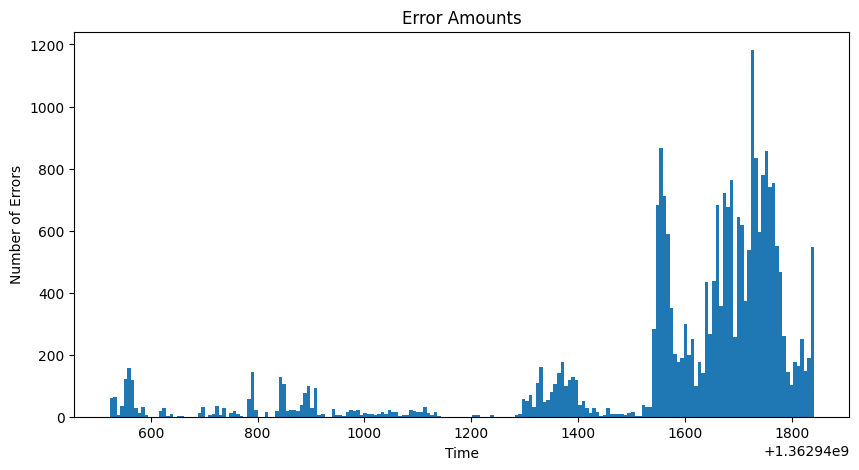

In [ ]:
# make histogram of the times where there are errors
plt.figure(figsize=(10, 5))
# plt.hist( times, np.arange( np.min(df['gps_time']), np.max('gps_time') ) )
plt.hist(times, bins=200)

plt.title('Error Amounts')
plt.xlabel('Time')
plt.ylabel('Number of Errors')
plt.show()

In [ ]:
print("max: " + str(np.max(df['gps_time'])))
print("min: " + str(np.min(df['gps_time'])))

max: 1362941841.9875112
min: 1362940522.0544188


- The dataframe shows the increased errors towards the end of the time frame
- Checked the time frame, all very small float values where the buckets are based on the values after time 1.36294e9

Friday, July 12, 2024

- different recording devices/recording streams, and the errors are errors of some nature in transmission could be flip error or corruption, don't even know if they are packets or frames

Baum Welch Algorithm
- Estimate the paramaters of the model (hidden) using the 8 channels of data, go from the observed data, make a model that should represent the true Markov data, and make it into a full model, which will correctly generalize to our observations and data
- Assume process can be reconstructed with some physics mathmetical way, looking for the "true" process and probability of the next error
- Baum Welch is used to build the HMM, and how? In theory we can take observations to estimate HMM parameters, how do we do that and how do we use the Baum Welch Algorithm? to use the bit error

## Inter-Arrival Times Between Errors

In [ ]:
differences = []
for val in range(0, len(df_filtered['gps_time'])-1):
  # print(df_filtered.iloc[:,0].values[val])
  differences.append(df_filtered.iloc[:,0].values[val+1] - df_filtered.iloc[:,0].values[val])


In [ ]:
print(differences)
print("max: " + str(np.max(differences)))
print("min: " + str(np.min(differences)))

[0.022708415985107422, 0.008964776992797852, 0.00583338737487793, 2.02154541015625, 0.020833492279052734, 0.0745704174041748, 0.0010416507720947266, 0.026041269302368164, 0.01041722297668457, 1.4158167839050293, 0.008541584014892578, 0.013343095779418945, 0.010624885559082031, 0.00020837783813476562, 0.0010416507720947266, 0.003958463668823242, 0.0054168701171875, 0.015416383743286133, 0.003333568572998047, 0.00270843505859375, 0.00020837783813476562, 0.002291440963745117, 0.0025000572204589844, 0.06227517127990723, 0.00020837783813476562, 0.0035419464111328125, 0.00020813941955566406, 0.0008335113525390625, 0.004166603088378906, 0.008125066757202148, 0.002707958221435547, 0.02458357810974121, 0.0022916793823242188, 0.2721223831176758, 0.026250123977661133, 0.13680076599121094, 0.00270843505859375, 0.00020813941955566406, 0.03291654586791992, 0.0020835399627685547, 0.16649842262268066, 0.027281999588012695, 0.010624885559082031, 0.014791488647460938, 0.4728877544403076, 0.0075001716613

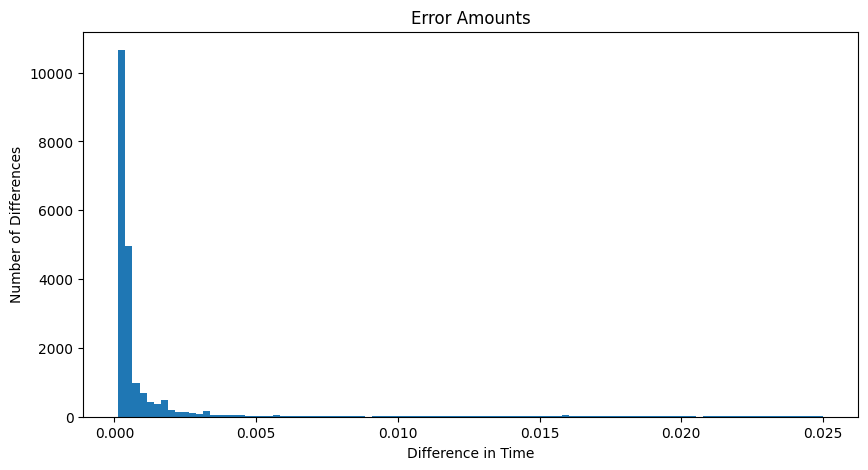

In [ ]:
# make histogram of the inter arrival times of the errors
plt.figure(figsize=(10, 5))
plt.hist(differences, bins=100, range=[0.00013709068298339844, 0.025])

plt.title('Error Amounts')
plt.xlabel('Difference in Time')
plt.ylabel('Number of Differences')
plt.show()

## Baum Welch Algorithm Notes

Goal: Observed data -> estimate parameters of HMM with forward-backward algorithm -> Prediction
- forward backward algorithm goes **forward** in time to compute probability for ending up in a particular state given first t observations in the sequence, and then **backward** in time, to provide probability of observing remaining observations given any starting point. **Combined**, give distribution over states at any specific point in time given entire observation sequence
- HMM = joint probability of collection of hidden and observed discrete random vars, relies on assumption that i-th hidden var is independent of previous hidden vars, current obs only depends on the current hidden state
- Baum Welch uses max likelihood estimate of parameters of HMM given observed feature vectors - HMM parameters that maximize probability of observation

https://en.wikipedia.org/wiki/Baum%E2%80%93Welch_algorithm

Code: https://github.com/RRisto/learning/blob/master/markov_chain_learn/baum_welch.ipynb

Detailed article on using Baum-Welch: https://ristohinno.medium.com/baum-welch-algorithm-4d4514cf9dbe

sequence = all times

- 8 different channels, single channel has error or no error observations, assumption on the number of states (easiest is 2 states), output will be transition probability models
- how many states we actually need will probably differ - we will try and see
- inputs as channels of data, plug into algo and get HMM



# Baum Welch

In [ ]:
# Code for Baum Welch Algorithm, including baum welch, forward, backward algos
import pandas as pd
import numpy as np

def forward(V, a, b, initial_distribution):
    T = V.shape[0]
    N = a.shape[0]
    alpha = np.zeros((T, N))
    scale_factors = np.zeros(T)

    # Initialization
    alpha[0, :] = initial_distribution * b[:, V[0]]
    scale_factors[0] = np.sum(alpha[0, :])
    alpha[0, :] /= scale_factors[0]

    # Induction
    for t in range(1, T):
        for j in range(N):
            alpha[t, j] = np.dot(alpha[t - 1], a[:, j]) * b[j, V[t]]
        scale_factors[t] = np.sum(alpha[t, :])
        if scale_factors[t] == 0:
            scale_factors[t] = 1e-10  # Prevent division by zero
        alpha[t, :] /= scale_factors[t]

    return alpha, scale_factors

def backward(V, a, b, scale_factors):
    T = V.shape[0]
    N = a.shape[0]
    beta = np.zeros((T, N))

    # Initialization
    beta[T - 1] = 1 / scale_factors[T - 1]

    # Induction
    for t in range(T - 2, -1, -1):
        for j in range(N):
            beta[t, j] = np.sum(a[j, :] * b[:, V[t + 1]] * beta[t + 1, :])
        beta[t, :] /= scale_factors[t]

    return beta

def baum_welch(V, a, b, initial_distribution, n_iter=10): # TO CHANGE, N_ITER
    M = a.shape[0]
    T = len(V)

    for n in range(n_iter):
        alpha, scale_factors = forward(V, a, b, initial_distribution)
        beta = backward(V, a, b, scale_factors)

        xi = np.zeros((M, M, T - 1))
        for t in range(T - 1):
            denominator = np.dot(np.dot(alpha[t, :].T, a) * b[:, V[t + 1]].T, beta[t + 1, :])
            if denominator == 0:
                denominator = 1e-10  # Prevent division by zero
            for i in range(M):
                numerator = alpha[t, i] * a[i, :] * b[:, V[t + 1]] * beta[t + 1, :]
                xi[i, :, t] = numerator / denominator

        gamma = np.sum(xi, axis=1)
        a = np.sum(xi, axis=2) / np.sum(gamma, axis=1, keepdims=True)

        # Add the last gamma
        gamma = np.hstack((gamma, np.sum(xi[:, :, T - 2], axis=0).reshape((-1, 1))))

        K = b.shape[1]
        denominator = np.sum(gamma, axis=1).reshape(-1, 1)
        for l in range(K):
            mask = V == l
            b[:, l] = np.sum(gamma[:, mask], axis=1)

        # Prevent division by zero
        denominator[denominator == 0] = 1e-10
        b = b / denominator

    return {"a": a, "b": b}


In [ ]:
def compute_log_likelihood(V, a, b, initial_distribution):
    """
    Compute the log-likelihood of the observed sequence V given the HMM parameters.
    """
    T = len(V)
    N = a.shape[0]

    alpha = np.zeros((T, N))
    scale_factors = np.zeros(T)

    # Forward Pass with Scaling
    # Initialization
    alpha[0, :] = initial_distribution * b[:, V[0]]
    scale_factors[0] = np.sum(alpha[0, :])
    if scale_factors[0] == 0:
        scale_factors[0] = 1e-10
    alpha[0, :] /= scale_factors[0]

    # Induction
    for t in range(1, T):
        for j in range(N):
            alpha[t, j] = np.dot(alpha[t - 1, :], a[:, j]) * b[j, V[t]]
        scale_factors[t] = np.sum(alpha[t, :])
        if scale_factors[t] == 0:
            scale_factors[t] = 1e-10
        alpha[t, :] /= scale_factors[t]

    # Compute Log-Likelihood
    log_likelihood = np.sum(np.log(scale_factors))
    return log_likelihood

In [ ]:
# Load and preprocess data
df = pd.read_csv("p25-2023-03-15-12-34-58-ch3.csv") # original file

In [ ]:
# Ensure the 'error' column is correctly processed
df['error'] = df[' error'].str.strip().apply(lambda x: 1 if x == 'E' else 0).astype(int)

In [ ]:
V = df['error'].values # observational sequence

In [ ]:
# 2 STATE initual distribution
distribution_noerror = len(np.where(V == 0)[0]) / len(V)
distribution_error = len(np.where(V == 1)[0])/ len(V)
initial_distribution = np.array([distribution_noerror, distribution_error])

In [ ]:
# Define initial parameters
a = np.array([[0.66679181, 0.33320819], [0.66111827, 0.33888173]], dtype=float)
b = np.array([[0.99841156, 0.00158844], [0.99041655, 0.00958344]], dtype=float)

In [ ]:
# Run Baum-Welch algorithm
result = baum_welch(V, a, b, initial_distribution, n_iter=1)
print("a = np.array(" + repr(result["a"].tolist()) + ", dtype=float)")
print("b = np.array(" + repr(result["b"].tolist()) + ", dtype=float)")

a = np.array([[0.6672752225155865, 0.33272477748441176], [0.6601634063748875, 0.33983659362511154]], dtype=float)
b = np.array([[0.9984223806257404, 0.0015776192605837013], [0.9903950448724971, 0.009604955064422037]], dtype=float)


In [ ]:
# calculate log likelihood
log_likelihood = compute_log_likelihood(V, result["a"], result["b"], initial_distribution)
print("Log Likelihood:", log_likelihood)

Log Likelihood: -160297.21564173908


In [ ]:
# Continue in a loop 2 states
a_loop = np.array([[0.669789297314914, 0.3302107026850863], [0.6552187144795386, 0.34478128552046294]], dtype=float)
b_loop = np.array([[0.9985177495241451, 0.0014822505156412927], [0.9902054554305278, 0.009794544508972181]], dtype=float)

for i in range(5):
  result = baum_welch(V, a_loop, b_loop, initial_distribution, n_iter=1)
  a_loop = result["a"]
  b_loop = result["b"]
  log_likelihood = compute_log_likelihood(V, result["a"], result["b"], initial_distribution)
  print("a = np.array(" + repr(result["a"].tolist()) + ", dtype=float)")
  print("b = np.array(" + repr(result["b"].tolist()) + ", dtype=float)")
  print("Log Likelihood:", log_likelihood)
  print("\n")

# a_loop_3 = np.array([[0.4923077998312771, 0.4923075814239972, 0.01538461874472741], [0.4923077998312737, 0.49230758142399766, 0.015384618744727303], [0.4923077998312771, 0.4923075814239972, 0.01538461874472741]], dtype=float)
# b_loop_3 = np.array([[0.9957323579588453, 0.004267642108257803, 0.0], [0.9957323555660975, 0.004267644487784371, 0.0], [0.9957323579588453, 0.004267642108257803, 0.0]], dtype=float)
# initial_distribution_loop_3 = np.array([0.5, 0.25, 0.25])

a = np.array([[0.6703193077797355, 0.329680692220262], [0.6541816712957834, 0.345818328704213]], dtype=float)
b = np.array([[0.9985451891804922, 0.001454810868514908], [0.9901508838303671, 0.009849116287668443]], dtype=float)
Log Likelihood: -160208.387144034


a = np.array([[0.6708611640103412, 0.3291388359896606], [0.6531237500922472, 0.34687624990774785]], dtype=float)
b = np.array([[0.9985754459456081, 0.0014245539324074126], [0.9900906959009795, 0.009909304048615898]], dtype=float)
Log Likelihood: -160190.09596986452


a = np.array([[0.6714161462981326, 0.3285838537018631], [0.6520428044553421, 0.34795719554465687]], dtype=float)
b = np.array([[0.998608520997253, 0.001391478899900447], [0.9900248859574923, 0.009975114157936218]], dtype=float)
Log Likelihood: -160170.41790742535


a = np.array([[0.6719855816035163, 0.3280144183964812], [0.6509366600679438, 0.34906333993205374]], dtype=float)
b = np.array([[0.998644404532212, 0.001355595560264089], [0.9899534671756315, 0.01004653287

In [ ]:
# Continue in a loop for each state
for n in range(2, 101):
  print(str(n) + " States, 5 Iterations")
  a = np.full((n, n), 1/n, dtype=float) # transition
  b = np.full((n, n), 1/n, dtype=float) # emission
  initial_distribution = np.full(n, 1/n, dtype=float)
  print("Initial Distribution: " + str(initial_distribution))
  print("Initial Transition: " + repr(a.tolist()))
  print("Initial Emission: " + repr(b.tolist()))

  log_likelihood_list = []

  for i in range(5):
    result = baum_welch(V, a, b, initial_distribution, n_iter=1)
    a = result["a"]
    b = result["b"]
    log_likelihood = compute_log_likelihood(V, result["a"], result["b"], initial_distribution)
    log_likelihood_list.append(log_likelihood)

    print("a = np.array(" + repr(result["a"].tolist()) + ", dtype=float)")
    print("b = np.array(" + repr(result["b"].tolist()) + ", dtype=float)")
    print("Log Likelihood:", log_likelihood)
    print("\n")

  print("Log Likelihood: " + str(log_likelihood_list))
  print("Average Log Likelihood: " + str(np.mean(log_likelihood_list)))
  print("Min Log Likelihood: " + str(np.min(log_likelihood_list)))
  print("\n")

2 States, 5 Iterations
Initial Distribution: [0.5 0.5]
Initial Transition: [[0.5, 0.5], [0.5, 0.5]]
Initial Emission: [[0.5, 0.5], [0.5, 0.5]]
a = np.array([[0.5, 0.5], [0.5, 0.5]], dtype=float)
b = np.array([[0.9957323567202842, 0.004267643279715811], [0.9957323567202842, 0.004267643279715811]], dtype=float)
Log Likelihood: -160357.00580107645




Original Results (But with wrong initial distribition)

```
a : array([[0.43718396, 0.56281604],
           [0.42301593, 0.57698407]]),
  
b : array([[0.99276511, 0.00723489],
           [0.99634995, 0.00365005]])

Log Likelihood: -191613.3925278929
```

# Notes for 12/13

Reduce iterations and see if time decreases, want to compare log likelihoods

- Also check using thinned input or run on smaller subset of data

Run with 3 states - change initial probabilities

- Initial probabilities should be a Nx1 matrix

If above goes well, try many many values of n, see the trends in log likelihood

## Results


**1**: `n_iter`=5, 2 states, ~7 min per run

Initial Values:
```
a = np.array([[0.5, 0.5], [0.5, 0.5]], dtype=float) # transition
b = np.array([[0.8, 0.2], [0.4, 0.6]], dtype=float) # emission
distribution_noerror = len(np.where(V == 0)[0]) / len(V)
distribution_error = len(np.where(V == 1)[0])/ len(V)
initial_distribution = np.array([distribution_noerror, distribution_error])
```
End

```
a = np.array([[0.66536173, 0.33463827], [0.66394952, 0.33605048]], dtype=float)
b = np.array([[0.99839535, 0.00160465], [0.99044875, 0.00955125]], dtype=float)
Log Likelihood: -160345.3885742972
```
->

```
a = np.array([[0.66583605, 0.33416395],[0.66300943, 0.33699057]], dtype=float)
b = np.array([[0.99839805, 0.00160195], [0.99044339, 0.00955661]], dtype=float)
Log Likelihood: -160333.6975603446
```
->


```
a = np.array([[0.66631242, 0.33368758], [0.66206631, 0.33793369]], dtype=float)
b = np.array([[0.99840345, 0.00159655],[0.99043266, 0.00956734]], dtype=float)
Log Likelihood: -160321.8361216598
```
->


```
a = np.array([[0.66679181, 0.33320819], [0.66111827, 0.33888173]], dtype=float)
b = np.array([[0.99841156, 0.00158844], [0.99041655, 0.00958344]], dtype=float)
Log Likelihood: -160309.70948492613
```
->


```
a = np.array([[0.6672752225155865, 0.33272477748441176], [0.6601634063748875, 0.33983659362511154]], dtype=float)
b = np.array([[0.9984223806257404, 0.0015776192605837013], [0.9903950448724971, 0.009604955064422037]], dtype=float)
Log Likelihood: -160297.21564173908
```
```
a = np.array([[0.6677636762237167, 0.33223632377628326], [0.6591998016734006, 0.340800198326601]], dtype=float)
b = np.array([[0.9984359315240732, 0.0015640683998055516], [0.9903681134690923, 0.009631886607822864]], dtype=float)
Log Likelihood: -160284.25232876968


a = np.array([[0.6682582171970133, 0.33174178280298555], [0.6582255158764073, 0.34177448412359623]], dtype=float)
b = np.array([[0.9984522266037514, 0.0015477732751035323], [0.9903357247367384, 0.0096642752115204]], dtype=float)
Log Likelihood: -160270.71272082537


a = np.array([[0.6687599212081339, 0.3312400787918666], [0.6572385800150484, 0.34276141998494586]], dtype=float)
b = np.array([[0.9984712832046903, 0.001528716753001849], [0.9902978433907286, 0.00970215667635086]], dtype=float)
Log Likelihood: -160256.48095078146


a = np.array([[0.6692698984099111, 0.3307301015900858], [0.6562369921706226, 0.3437630078293756]], dtype=float)
b = np.array([[0.9984931188132663, 0.0015068813074755718], [0.9902544318520691, 0.00974556800523917]], dtype=float)
Log Likelihood: -160241.4371650847


a = np.array([[0.669789297314914, 0.3302107026850863], [0.6552187144795386, 0.34478128552046294]], dtype=float)
b = np.array([[0.9985177495241451, 0.0014822505156412927], [0.9902054554305278, 0.009794544508972181]], dtype=float)
Log Likelihood: -160225.45224135512
```

Log likelihood is decreasing by around 30 each time


**2**: `n_iter`=5, 3 states, ~7 min per run

Initial Values:
```
a_loop_3 = np.array([[0.4, 0.4, 0.2], [0.4, 0.4, 0.2], [0.4, 0.4, 0.2]], dtype=float)
b_loop_3 = np.array([[0.4, 0.4, 0.2], [0.4, 0.4, 0.2], [0.4, 0.4, 0.2]], dtype=float)
initial_distribution_loop_3 = np.array([0.5, 0.25, 0.25])
```

Results:
```
a = np.array([[0.3999999999999926, 0.3999999999999926, 0.1999999999999963], [0.3999999999999926, 0.3999999999999926, 0.1999999999999963], [0.3999999999999926, 0.3999999999999926, 0.1999999999999963]], dtype=float)
b = np.array([[0.9957323567950619, 0.0042676430964424, 0.0], [0.9957323563368835, 0.004267643554620923, 0.0], [0.9957323567950619, 0.0042676430964424, 0.0]], dtype=float)
Log Likelihood: -160357.00643278935


a = np.array([[0.44444446565155693, 0.4444444179355491, 0.11111111641288923], [0.4444444656515577, 0.44444441793555256, 0.11111111641288943], [0.44444446565155693, 0.4444444179355491, 0.11111111641288923]], dtype=float)
b = np.array([[0.9957323571785412, 0.004267642866629298, 0.0], [0.9957323561752143, 0.004267643796077171, 0.0], [0.9957323571785412, 0.004267642866629298, 0.0]], dtype=float)
Log Likelihood: -160357.0057292824


a = np.array([[0.4705882835406791, 0.47058818101674127, 0.05882353544258489], [0.4705882835406763, 0.47058818101673494, 0.058823535442584535], [0.4705882835406791, 0.47058818101674127, 0.05882353544258489]], dtype=float)
b = np.array([[0.9957323573881595, 0.004267642616613095, 0.0], [0.9957323558775689, 0.004267644025701426, 0.0], [0.9957323573881595, 0.004267642616613095, 0.0]], dtype=float)
Log Likelihood: -160357.00605135562


a = np.array([[0.4848485624903015, 0.48484840235405974, 0.030303035155643844], [0.4848485624902996, 0.484848402354056, 0.030303035155643726], [0.4848485624903015, 0.48484840235405974, 0.030303035155643844]], dtype=float)
b = np.array([[0.9957323575767423, 0.004267642361721759, 0.0], [0.99573235569782, 0.004267644255079731, 0.0], [0.9957323575767423, 0.004267642361721759, 0.0]], dtype=float)
Log Likelihood: -160357.0061185474


a = np.array([[0.4923077998312771, 0.4923075814239972, 0.01538461874472741], [0.4923077998312737, 0.49230758142399766, 0.015384618744727303], [0.4923077998312771, 0.4923075814239972, 0.01538461874472741]], dtype=float)
b = np.array([[0.9957323579588453, 0.004267642108257803, 0.0], [0.9957323555660975, 0.004267644487784371, 0.0], [0.9957323579588453, 0.004267642108257803, 0.0]], dtype=float)
Log Likelihood: -160357.00544832624
```

Run for as many states as possible, maybe 10 or so
What is Expectation maximization?